✅ Libraries imported successfully!
DATA CLEANING AND PREPARATION
Original dataset shape: (1465, 16)
Removed 1 rows with missing values
Clean dataset shape: (1464, 16)

FEATURE ENGINEERING
✅ Feature engineering completed!
Final dataset shape: (1464, 20)

📊 Basic Statistics:
       discounted_price   actual_price  discount_percentage       rating  \
count       1464.000000    1464.000000          1464.000000  1464.000000   
mean        3126.011906    5447.002923            47.713115     4.096585   
std         6946.625442   10878.270001            21.627422     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          323.750000     800.000000            32.000000     4.000000   
50%          799.000000    1650.000000            50.000000     4.100000   
75%         1999.000000    4303.750000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1462.0000

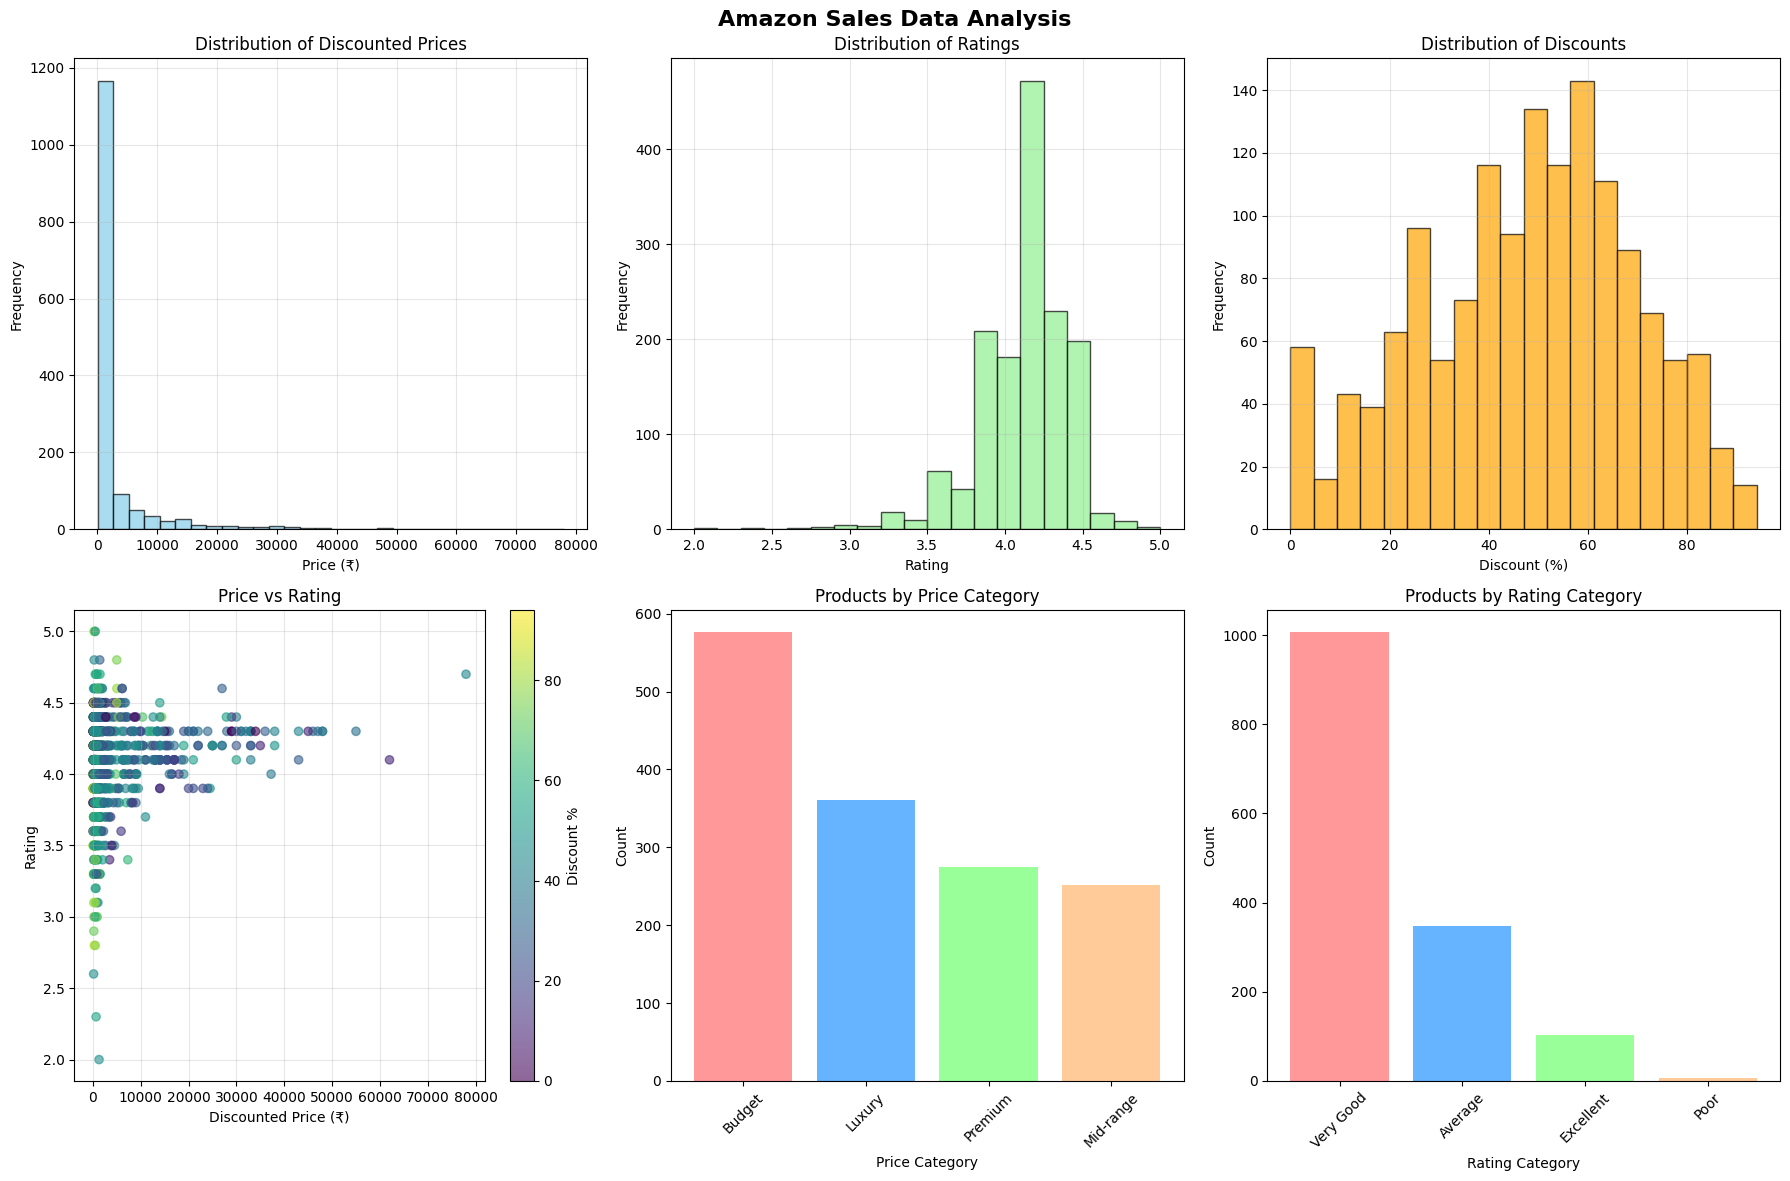


STATISTICAL ANALYSIS


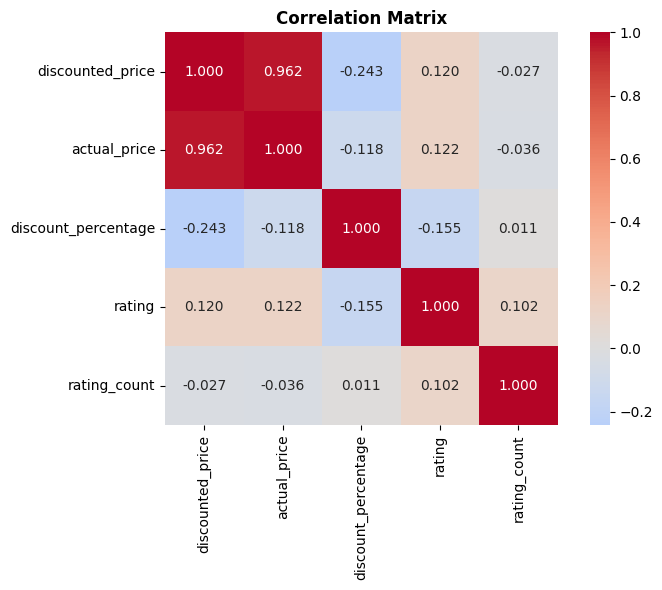


📈 TOP CATEGORIES ANALYSIS:
Top 10 categories by product count:
                       product_count  avg_price  avg_rating  avg_discount
main_category                                                            
Electronics                      526    5965.89        4.08         50.83
Computers&Accessories            453     842.65        4.15         54.02
Home&Kitchen                     447    2331.13        4.04         40.17
OfficeProducts                    31     301.58        4.31         12.35
MusicalInstruments                 2     638.00        3.90         46.00
HomeImprovement                    2     337.00        4.25         57.50
Car&Motorbike                      1    2339.00        3.80         42.00
Health&PersonalCare                1     899.00        4.00         53.00
Toys&Games                         1     150.00        4.30          0.00

ADVANCED BUSINESS INSIGHTS
🏆 TOP 10 BEST VALUE PRODUCTS:
• REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi... | Price:

In [3]:
# =============================================================================
# AMAZON SALES DATA ANALYSIS - COMPLETE WORKING CODE
# =============================================================================

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

# Step 2: Data Cleaning and Preparation
print("="*50)
print("DATA CLEANING AND PREPARATION")
print("="*50)

# Create a copy for cleaning
df_clean = df.copy()

print(f"Original dataset shape: {df_clean.shape}")

# Clean discounted_price
df_clean['discounted_price'] = df_clean['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Clean actual_price
df_clean['actual_price'] = df_clean['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Clean discount_percentage
df_clean['discount_percentage'] = df_clean['discount_percentage'].str.replace('%', '').astype(float)

# Clean rating (convert to numeric, handle errors)
df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')

# Clean rating_count
df_clean['rating_count'] = df_clean['rating_count'].str.replace(',', '').astype(float)

# Remove rows with missing critical values
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['discounted_price', 'actual_price', 'rating', 'discount_percentage'])
print(f"Removed {initial_count - len(df_clean)} rows with missing values")
print(f"Clean dataset shape: {df_clean.shape}")

# Step 3: Feature Engineering
print("\n" + "="*50)
print("FEATURE ENGINEERING")
print("="*50)

# Calculate discount amount
df_clean['discount_amount'] = df_clean['actual_price'] - df_clean['discounted_price']

# Create price categories
def price_category(price):
    if price < 500:
        return 'Budget'
    elif price < 1000:
        return 'Mid-range'
    elif price < 2000:
        return 'Premium'
    else:
        return 'Luxury'

df_clean['price_category'] = df_clean['discounted_price'].apply(price_category)

# Create rating categories
def rating_category(rating):
    if rating >= 4.5:
        return 'Excellent'
    elif rating >= 4.0:
        return 'Very Good'
    elif rating >= 3.0:
        return 'Average'
    else:
        return 'Poor'

df_clean['rating_category'] = df_clean['rating'].apply(rating_category)

# Extract main category
df_clean['main_category'] = df_clean['category'].apply(lambda x: x.split('|')[0] if '|' in str(x) else str(x))

print("✅ Feature engineering completed!")
print(f"Final dataset shape: {df_clean.shape}")

# Display basic statistics
print("\n📊 Basic Statistics:")
print(df_clean[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].describe())

# Step 4: Exploratory Data Analysis
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Amazon Sales Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Price distribution
axes[0,0].hist(df_clean['discounted_price'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribution of Discounted Prices')
axes[0,0].set_xlabel('Price (₹)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Rating distribution
axes[0,1].hist(df_clean['rating'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Distribution of Ratings')
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Discount distribution
axes[0,2].hist(df_clean['discount_percentage'], bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[0,2].set_title('Distribution of Discounts')
axes[0,2].set_xlabel('Discount (%)')
axes[0,2].set_ylabel('Frequency')
axes[0,2].grid(True, alpha=0.3)

# Plot 4: Price vs Rating
scatter = axes[1,0].scatter(df_clean['discounted_price'], df_clean['rating'],
                           alpha=0.6, c=df_clean['discount_percentage'], cmap='viridis')
axes[1,0].set_title('Price vs Rating')
axes[1,0].set_xlabel('Discounted Price (₹)')
axes[1,0].set_ylabel('Rating')
axes[1,0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1,0], label='Discount %')

# Plot 5: Price categories
price_counts = df_clean['price_category'].value_counts()
axes[1,1].bar(price_counts.index, price_counts.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1,1].set_title('Products by Price Category')
axes[1,1].set_xlabel('Price Category')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

# Plot 6: Rating categories
rating_counts = df_clean['rating_category'].value_counts()
axes[1,2].bar(rating_counts.index, rating_counts.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1,2].set_title('Products by Rating Category')
axes[1,2].set_xlabel('Rating Category')
axes[1,2].set_ylabel('Count')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Step 5: Statistical Analysis
print("\n" + "="*50)
print("STATISTICAL ANALYSIS")
print("="*50)

# Correlation matrix
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f', square=True)
plt.title('Correlation Matrix', fontweight='bold')
plt.tight_layout()
plt.show()

# Category analysis
print("\n📈 TOP CATEGORIES ANALYSIS:")
category_stats = df_clean.groupby('main_category').agg({
    'discounted_price': ['count', 'mean'],
    'rating': 'mean',
    'discount_percentage': 'mean'
}).round(2)

category_stats.columns = ['product_count', 'avg_price', 'avg_rating', 'avg_discount']
category_stats = category_stats.sort_values('product_count', ascending=False)

print("Top 10 categories by product count:")
print(category_stats.head(10))

# Step 6: Advanced Insights
print("\n" + "="*50)
print("ADVANCED BUSINESS INSIGHTS")
print("="*50)

# Best value products (high rating + good discount + reasonable price)
df_clean['value_score'] = (df_clean['rating'] * 0.5 +
                          (df_clean['discount_percentage'] / 100) * 0.3 +
                          (1 / (df_clean['discounted_price'] / 1000 + 1)) * 0.2)

best_value = df_clean.nlargest(10, 'value_score')[[
    'product_name', 'main_category', 'discounted_price', 'rating',
    'discount_percentage', 'value_score'
]].round(3)

print("🏆 TOP 10 BEST VALUE PRODUCTS:")
for idx, row in best_value.iterrows():
    print(f"• {row['product_name'][:50]}... | Price: ₹{row['discounted_price']} | Rating: {row['rating']} | Discount: {row['discount_percentage']}%")

# Price segment analysis
print("\n💰 PRICE SEGMENT ANALYSIS:")
segment_analysis = df_clean.groupby('price_category').agg({
    'discounted_price': 'count',
    'rating': 'mean',
    'discount_percentage': 'mean',
    'rating_count': 'mean'
}).round(2)

print(segment_analysis)

# Discount effectiveness
print("\n🎯 DISCOUNT EFFECTIVENESS:")
discount_bins = [0, 30, 50, 70, 100]
discount_labels = ['Low (0-30%)', 'Medium (30-50%)', 'High (50-70%)', 'Very High (70-100%)']
df_clean['discount_level'] = pd.cut(df_clean['discount_percentage'], bins=discount_bins, labels=discount_labels)

discount_analysis = df_clean.groupby('discount_level').agg({
    'rating': 'mean',
    'rating_count': 'mean'
}).round(2)

print(discount_analysis)

# Step 7: Key Findings and Summary
print("\n" + "="*50)
print("KEY FINDINGS SUMMARY")
print("="*50)

# Calculate key metrics
total_products = len(df_clean)
avg_price = df_clean['discounted_price'].mean()
avg_rating = df_clean['rating'].mean()
avg_discount = df_clean['discount_percentage'].mean()

print(f"📊 DATASET SUMMARY:")
print(f"   • Total Products: {total_products}")
print(f"   • Average Price: ₹{avg_price:.2f}")
print(f"   • Average Rating: {avg_rating:.2f}/5")
print(f"   • Average Discount: {avg_discount:.2f}%")

print(f"\n🔍 KEY INSIGHTS:")
print(f"   • Price-Rating Correlation: {corr_matrix.loc['discounted_price', 'rating']:.3f}")
print(f"   • Discount-Rating Correlation: {corr_matrix.loc['discount_percentage', 'rating']:.3f}")

# Top performing category
top_category = category_stats.index[0]
top_category_count = category_stats.iloc[0]['product_count']
print(f"   • Most Popular Category: {top_category} ({top_category_count} products)")

# High value products count
high_value = df_clean[(df_clean['rating'] >= 4.0) & (df_clean['discounted_price'] <= 500)]
print(f"   • High Value Products (Rating≥4.0 & Price≤₹500): {len(high_value)}")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
print(f"   • Focus on {top_category} category for maximum reach")
print(f"   • Promote budget-friendly high-rated products for customer acquisition")
print(f"   • Maintain moderate discounts (30-50%) for optimal ratings")

# Save cleaned data
df_clean.to_csv('amazon_sales_analysis_cleaned.csv', index=False)
print(f"\n💾 Cleaned data saved: 'amazon_sales_analysis_cleaned.csv'")

print("\n✅ ANALYSIS COMPLETED SUCCESSFULLY!")
print("🎉 READY FOR SUBMISSION!")